In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from identification import *

plt.style.use('default')

In [2]:

df_data_090 = pd.read_csv('../data/entrada_saida_cossenos_n10_emax_tempo_9v.csv'  , header=None)
df_data_097 = pd.read_csv('../data/entrada_saida_cossenos_n10_emax_tempo_97v.csv' , header=None)
df_data_104 = pd.read_csv('../data/entrada_saida_cossenos_n10_emax_tempo_104v.csv', header=None)
df_data_111 = pd.read_csv('../data/entrada_saida_cossenos_n10_emax_tempo_111v.csv', header=None)

In [3]:
data_090 = np.array(df_data_090, ndmin=2)
u_ar_090 = np.array(df_data_090[0],ndmin=2).T
y_ar_090 = np.array(df_data_090[1],ndmin=2).T

data_097 = np.array(df_data_097, ndmin=2)
u_ar_097 = np.array(df_data_097[0],ndmin=2).T
y_ar_097 = np.array(df_data_097[1],ndmin=2).T

data_104 = np.array(df_data_104, ndmin=2)
u_ar_104 = np.array(df_data_104[0],ndmin=2).T
y_ar_104 = np.array(df_data_104[1],ndmin=2).T

data_111 = np.array(df_data_111, ndmin=2)
u_ar_111 = np.array(df_data_111[0],ndmin=2).T
y_ar_111 = np.array(df_data_111[1],ndmin=2).T

### removendo o tempo morto manualmente

In [4]:
def number_of_zeros(x):
    for i in range(x.size):
        if x[i] != 0:
            return i
    return 0

In [5]:
nz = number_of_zeros(y_ar_090)
y_ar_090 = y_ar_090[nz-1:]
u_ar_090 = u_ar_090[nz-1:]
nz = number_of_zeros(y_ar_097)
y_ar_097 = y_ar_097[nz-1:]
u_ar_097 = u_ar_097[nz-1:]
nz = number_of_zeros(y_ar_104)
y_ar_104 = y_ar_104[nz-1:]
u_ar_104 = u_ar_104[nz-1:]
nz = number_of_zeros(y_ar_111)
y_ar_111 = y_ar_111[nz-1:]
u_ar_111 = u_ar_111[nz-1:]


In [6]:
nmax = min(y_ar_090.size,y_ar_097.size,y_ar_104.size,y_ar_111.size)

y_ar_090 = y_ar_090[:nmax]
y_ar_097 = y_ar_097[:nmax]
y_ar_104 = y_ar_104[:nmax]
y_ar_111 = y_ar_111[:nmax]

u_ar_090 = u_ar_090[:nmax]
u_ar_097 = u_ar_097[:nmax]
u_ar_104 = u_ar_104[:nmax]
u_ar_111 = u_ar_111[:nmax]


In [7]:
print(y_ar_090[:2], y_ar_097[:2], y_ar_104[:2], y_ar_111[:2])

print(y_ar_090.size == y_ar_097.size == y_ar_104.size == y_ar_111.size)

[[0.        ]
 [7.06825656]] [[0.        ]
 [6.09698343]] [[0.        ]
 [7.15331448]] [[0.       ]
 [6.2712073]]
True


Modelo ARX:

1ª ordem:: y(k) = -ay(k-1) + bu(k-1)

 2ª ordem:: y(k) = - a1*y(k-1) - a2*y(k-2) + b1*u(k-1) + b2*u(k-2)

3ª ordem:: y(k) = - a1*y(k-1) - a2*y(k-2) - a3*y(k-3) + b1*u(k-1) + b2*u(k-2) + b3*u(k-3)

4ª ordem:: y(k) = - a1*y(k-1) - a2*y(k-2) - a3*y(k-3) - a4*y(k-4) + b1*u(k-1) + b2*u(k-2) + b3*u(k-3) + b4*u(k-4)

Modelo discretizado das equações diferenciais (vazio): y(k) = - a1*y(k-1) - a2*y(k-2) + b1*u(k-2)

In [8]:
Y_1o_090, phi_1o_090 =      build_Y_phi_ARX(u_ar_090,y_ar_090,1)
Y_2o_090, phi_2o_090 =      build_Y_phi_ARX(u_ar_090,y_ar_090,2)
Y_3o_090, phi_3o_090 =      build_Y_phi_ARX(u_ar_090,y_ar_090,3)
Y_4o_090, phi_4o_090 =      build_Y_phi_ARX(u_ar_090,y_ar_090,4)
Y_5o_090, phi_5o_090 =      build_Y_phi_ARX(u_ar_090,y_ar_090,5)
Y_6o_090, phi_6o_090 =      build_Y_phi_ARX(u_ar_090,y_ar_090,6)
Y_7o_090, phi_7o_090 =      build_Y_phi_ARX(u_ar_090,y_ar_090,7)
Y_8o_090, phi_8o_090 =      build_Y_phi_ARX(u_ar_090,y_ar_090,8)
Y_9o_090, phi_9o_090 =      build_Y_phi_ARX(u_ar_090,y_ar_090,9)
Y_0o_090, phi_0o_090 =      build_Y_phi_ARX(u_ar_090,y_ar_090,10)
Y_ed_090, phi_ed_090 = build_Y_phi_ed_empty(u_ar_090, y_ar_090)

theta_hat_1o_090 = calcular_theta_min_quad(Y_1o_090,phi_1o_090)
theta_hat_2o_090 = calcular_theta_min_quad(Y_2o_090,phi_2o_090)
theta_hat_3o_090 = calcular_theta_min_quad(Y_3o_090,phi_3o_090)
theta_hat_4o_090 = calcular_theta_min_quad(Y_4o_090,phi_4o_090)
theta_hat_5o_090 = calcular_theta_min_quad(Y_5o_090,phi_5o_090)
theta_hat_6o_090 = calcular_theta_min_quad(Y_6o_090,phi_6o_090)
theta_hat_7o_090 = calcular_theta_min_quad(Y_7o_090,phi_7o_090)
theta_hat_8o_090 = calcular_theta_min_quad(Y_8o_090,phi_8o_090)
theta_hat_9o_090 = calcular_theta_min_quad(Y_9o_090,phi_9o_090)
theta_hat_0o_090 = calcular_theta_min_quad(Y_0o_090,phi_0o_090)
theta_hat_ed_090 = calcular_theta_min_quad(Y_ed_090,phi_ed_090)

y_hat_1o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_1o_090,ord=1)
y_hat_2o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_2o_090,ord=2)
y_hat_3o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_3o_090,ord=3)
y_hat_4o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_4o_090,ord=4)
y_hat_5o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_5o_090,ord=4)
y_hat_6o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_6o_090,ord=4)
y_hat_7o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_7o_090,ord=4)
y_hat_8o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_8o_090,ord=4)
y_hat_9o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_9o_090,ord=4)
y_hat_0o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_0o_090,ord=4)
y_hat_ed_090 = estimate_output_ed_empty(y_ar_090,u_ar_090,theta_hat_ed_090)

V_1o_090 = cost_func(y_ar_090, y_hat_1o_090)
V_2o_090 = cost_func(y_ar_090, y_hat_2o_090)
V_3o_090 = cost_func(y_ar_090, y_hat_3o_090)
V_4o_090 = cost_func(y_ar_090, y_hat_4o_090)
V_5o_090 = cost_func(y_ar_090, y_hat_5o_090)
V_6o_090 = cost_func(y_ar_090, y_hat_6o_090)
V_7o_090 = cost_func(y_ar_090, y_hat_7o_090)
V_8o_090 = cost_func(y_ar_090, y_hat_8o_090)
V_9o_090 = cost_func(y_ar_090, y_hat_9o_090)
V_0o_090 = cost_func(y_ar_090, y_hat_0o_090)
V_ed_090 = cost_func(y_ar_090, y_hat_ed_090)

In [9]:
Y_1o_097, phi_1o_097 =      build_Y_phi_ARX(u_ar_097,y_ar_097,1)
Y_2o_097, phi_2o_097 =      build_Y_phi_ARX(u_ar_097,y_ar_097,2)
Y_3o_097, phi_3o_097 =      build_Y_phi_ARX(u_ar_097,y_ar_097,3)
Y_4o_097, phi_4o_097 =      build_Y_phi_ARX(u_ar_097,y_ar_097,4)
Y_5o_097, phi_5o_097 =      build_Y_phi_ARX(u_ar_097,y_ar_097,5)
Y_6o_097, phi_6o_097 =      build_Y_phi_ARX(u_ar_097,y_ar_097,6)
Y_7o_097, phi_7o_097 =      build_Y_phi_ARX(u_ar_097,y_ar_097,7)
Y_8o_097, phi_8o_097 =      build_Y_phi_ARX(u_ar_097,y_ar_097,8)
Y_9o_097, phi_9o_097 =      build_Y_phi_ARX(u_ar_097,y_ar_097,9)
Y_0o_097, phi_0o_097 =      build_Y_phi_ARX(u_ar_097,y_ar_097,10)
Y_ed_097, phi_ed_097 = build_Y_phi_ed_empty(u_ar_097,y_ar_097)

theta_hat_1o_097 = calcular_theta_min_quad(Y_1o_097,phi_1o_097)
theta_hat_2o_097 = calcular_theta_min_quad(Y_2o_097,phi_2o_097)
theta_hat_3o_097 = calcular_theta_min_quad(Y_3o_097,phi_3o_097)
theta_hat_4o_097 = calcular_theta_min_quad(Y_4o_097,phi_4o_097)
theta_hat_5o_097 = calcular_theta_min_quad(Y_5o_097,phi_5o_097)
theta_hat_6o_097 = calcular_theta_min_quad(Y_6o_097,phi_6o_097)
theta_hat_7o_097 = calcular_theta_min_quad(Y_7o_097,phi_7o_097)
theta_hat_8o_097 = calcular_theta_min_quad(Y_8o_097,phi_8o_097)
theta_hat_9o_097 = calcular_theta_min_quad(Y_9o_097,phi_9o_097)
theta_hat_0o_097 = calcular_theta_min_quad(Y_0o_097,phi_0o_097)
theta_hat_ed_097 = calcular_theta_min_quad(Y_ed_097,phi_ed_097)

y_hat_1o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_1o_097,ord=1)
y_hat_2o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_2o_097,ord=2)
y_hat_3o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_3o_097,ord=3)
y_hat_4o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_4o_097,ord=4)
y_hat_5o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_5o_097,ord=4)
y_hat_6o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_6o_097,ord=4)
y_hat_7o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_7o_097,ord=4)
y_hat_8o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_8o_097,ord=4)
y_hat_9o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_9o_097,ord=4)
y_hat_0o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_0o_097,ord=4)
y_hat_ed_097 = estimate_output_ed_empty(y_ar_097,u_ar_097,theta_hat_ed_097)

V_1o_097 = cost_func(y_ar_097,y_hat_1o_097)
V_2o_097 = cost_func(y_ar_097,y_hat_2o_097)
V_3o_097 = cost_func(y_ar_097,y_hat_3o_097)
V_4o_097 = cost_func(y_ar_097,y_hat_4o_097)
V_5o_097 = cost_func(y_ar_097,y_hat_5o_097)
V_6o_097 = cost_func(y_ar_097,y_hat_6o_097)
V_7o_097 = cost_func(y_ar_097,y_hat_7o_097)
V_8o_097 = cost_func(y_ar_097,y_hat_8o_097)
V_9o_097 = cost_func(y_ar_097,y_hat_9o_097)
V_0o_097 = cost_func(y_ar_097,y_hat_0o_097)
V_ed_097 = cost_func(y_ar_097,y_hat_ed_097)

In [10]:
Y_1o_104, phi_1o_104 =      build_Y_phi_ARX(u_ar_104,y_ar_104,1)
Y_2o_104, phi_2o_104 =      build_Y_phi_ARX(u_ar_104,y_ar_104,2)
Y_3o_104, phi_3o_104 =      build_Y_phi_ARX(u_ar_104,y_ar_104,3)
Y_4o_104, phi_4o_104 =      build_Y_phi_ARX(u_ar_104,y_ar_104,4)
Y_5o_104, phi_5o_104 =      build_Y_phi_ARX(u_ar_104,y_ar_104,5)
Y_6o_104, phi_6o_104 =      build_Y_phi_ARX(u_ar_104,y_ar_104,6)
Y_7o_104, phi_7o_104 =      build_Y_phi_ARX(u_ar_104,y_ar_104,7)
Y_8o_104, phi_8o_104 =      build_Y_phi_ARX(u_ar_104,y_ar_104,8)
Y_9o_104, phi_9o_104 =      build_Y_phi_ARX(u_ar_104,y_ar_104,9)
Y_0o_104, phi_0o_104 =      build_Y_phi_ARX(u_ar_104,y_ar_104,10)
Y_ed_104, phi_ed_104 = build_Y_phi_ed_empty(u_ar_104,y_ar_104)

theta_hat_1o_104 = calcular_theta_min_quad(Y_1o_104,phi_1o_104)
theta_hat_2o_104 = calcular_theta_min_quad(Y_2o_104,phi_2o_104)
theta_hat_3o_104 = calcular_theta_min_quad(Y_3o_104,phi_3o_104)
theta_hat_4o_104 = calcular_theta_min_quad(Y_4o_104,phi_4o_104)
theta_hat_5o_104 = calcular_theta_min_quad(Y_5o_104,phi_5o_104)
theta_hat_6o_104 = calcular_theta_min_quad(Y_6o_104,phi_6o_104)
theta_hat_7o_104 = calcular_theta_min_quad(Y_7o_104,phi_7o_104)
theta_hat_8o_104 = calcular_theta_min_quad(Y_8o_104,phi_8o_104)
theta_hat_9o_104 = calcular_theta_min_quad(Y_9o_104,phi_9o_104)
theta_hat_0o_104 = calcular_theta_min_quad(Y_0o_104,phi_0o_104)
theta_hat_ed_104 = calcular_theta_min_quad(Y_ed_104,phi_ed_104)

y_hat_1o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_1o_104,ord=1)
y_hat_2o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_2o_104,ord=2)
y_hat_3o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_3o_104,ord=3)
y_hat_4o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_4o_104,ord=4)
y_hat_5o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_5o_104,ord=4)
y_hat_6o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_6o_104,ord=4)
y_hat_7o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_7o_104,ord=4)
y_hat_8o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_8o_104,ord=4)
y_hat_9o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_9o_104,ord=4)
y_hat_0o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_0o_104,ord=4)
y_hat_ed_104 = estimate_output_ed_empty(y_ar_104,u_ar_104,theta_hat_ed_104)

V_1o_104 = cost_func(y_ar_104,y_hat_1o_104)
V_2o_104 = cost_func(y_ar_104,y_hat_2o_104)
V_3o_104 = cost_func(y_ar_104,y_hat_3o_104)
V_4o_104 = cost_func(y_ar_104,y_hat_4o_104)
V_5o_104 = cost_func(y_ar_104,y_hat_5o_104)
V_6o_104 = cost_func(y_ar_104,y_hat_6o_104)
V_7o_104 = cost_func(y_ar_104,y_hat_7o_104)
V_8o_104 = cost_func(y_ar_104,y_hat_8o_104)
V_9o_104 = cost_func(y_ar_104,y_hat_9o_104)
V_0o_104 = cost_func(y_ar_104,y_hat_0o_104)
V_ed_104 = cost_func(y_ar_104,y_hat_ed_104)

In [11]:
Y_1o_111, phi_1o_111 =      build_Y_phi_ARX(u_ar_111,y_ar_111,1)
Y_2o_111, phi_2o_111 =      build_Y_phi_ARX(u_ar_111,y_ar_111,2)
Y_3o_111, phi_3o_111 =      build_Y_phi_ARX(u_ar_111,y_ar_111,3)
Y_4o_111, phi_4o_111 =      build_Y_phi_ARX(u_ar_111,y_ar_111,4)
Y_5o_111, phi_5o_111 =      build_Y_phi_ARX(u_ar_111,y_ar_111,5)
Y_6o_111, phi_6o_111 =      build_Y_phi_ARX(u_ar_111,y_ar_111,6)
Y_7o_111, phi_7o_111 =      build_Y_phi_ARX(u_ar_111,y_ar_111,7)
Y_8o_111, phi_8o_111 =      build_Y_phi_ARX(u_ar_111,y_ar_111,8)
Y_9o_111, phi_9o_111 =      build_Y_phi_ARX(u_ar_111,y_ar_111,9)
Y_0o_111, phi_0o_111 =      build_Y_phi_ARX(u_ar_111,y_ar_111,10)
Y_ed_111, phi_ed_111 = build_Y_phi_ed_empty(u_ar_111,y_ar_111)

theta_hat_1o_111 = calcular_theta_min_quad(Y_1o_111,phi_1o_111)
theta_hat_2o_111 = calcular_theta_min_quad(Y_2o_111,phi_2o_111)
theta_hat_3o_111 = calcular_theta_min_quad(Y_3o_111,phi_3o_111)
theta_hat_4o_111 = calcular_theta_min_quad(Y_4o_111,phi_4o_111)
theta_hat_5o_111 = calcular_theta_min_quad(Y_5o_111,phi_5o_111)
theta_hat_6o_111 = calcular_theta_min_quad(Y_6o_111,phi_6o_111)
theta_hat_7o_111 = calcular_theta_min_quad(Y_7o_111,phi_7o_111)
theta_hat_8o_111 = calcular_theta_min_quad(Y_8o_111,phi_8o_111)
theta_hat_9o_111 = calcular_theta_min_quad(Y_9o_111,phi_9o_111)
theta_hat_0o_111 = calcular_theta_min_quad(Y_0o_111,phi_0o_111)
theta_hat_ed_111 = calcular_theta_min_quad(Y_ed_111,phi_ed_111)

y_hat_1o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_1o_111,ord=1)
y_hat_2o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_2o_111,ord=2)
y_hat_3o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_3o_111,ord=3)
y_hat_4o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_4o_111,ord=4)
y_hat_5o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_5o_111,ord=4)
y_hat_6o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_6o_111,ord=4)
y_hat_7o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_7o_111,ord=4)
y_hat_8o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_8o_111,ord=4)
y_hat_9o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_9o_111,ord=4)
y_hat_0o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_0o_111,ord=4)
y_hat_ed_111 = estimate_output_ed_empty(y_ar_111,u_ar_111,theta_hat_ed_111)

V_1o_111 = cost_func(y_ar_111,y_hat_1o_111)
V_2o_111 = cost_func(y_ar_111,y_hat_2o_111)
V_3o_111 = cost_func(y_ar_111,y_hat_3o_111)
V_4o_111 = cost_func(y_ar_111,y_hat_4o_111)
V_5o_111 = cost_func(y_ar_111,y_hat_5o_111)
V_6o_111 = cost_func(y_ar_111,y_hat_6o_111)
V_7o_111 = cost_func(y_ar_111,y_hat_7o_111)
V_8o_111 = cost_func(y_ar_111,y_hat_8o_111)
V_9o_111 = cost_func(y_ar_111,y_hat_9o_111)
V_0o_111 = cost_func(y_ar_111,y_hat_0o_111)
V_ed_111 = cost_func(y_ar_111,y_hat_ed_111)

In [12]:
print('9V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_090,1)},    ARX 6ª ordem V = {np.round(V_6o_090,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_090,1)},    ARX 7ª ordem V = {np.round(V_7o_090,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_090,1)},    ARX 8ª ordem V = {np.round(V_8o_090,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_090,1)},    ARX 9ª ordem V = {np.round(V_9o_090,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_090,1)},    ARX 10ªordem V = {np.round(V_0o_090,1)}')
print(f'discretizado V = {np.round(V_ed_090,1)}')

print('9.7V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_097,1)},    ARX 6ª ordem V = {np.round(V_6o_097,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_097,1)},    ARX 7ª ordem V = {np.round(V_7o_097,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_097,1)},    ARX 8ª ordem V = {np.round(V_8o_097,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_097,1)},    ARX 9ª ordem V = {np.round(V_9o_097,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_097,1)},    ARX 10ªordem V = {np.round(V_0o_097,1)}')
print(f'discretizado V = {np.round(V_ed_097,1)}')

print('10.4V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_104,1)},    ARX 6ª ordem V = {np.round(V_6o_104,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_104,1)},    ARX 7ª ordem V = {np.round(V_7o_104,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_104,1)},    ARX 8ª ordem V = {np.round(V_8o_104,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_104,1)},    ARX 9ª ordem V = {np.round(V_9o_104,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_104,1)},    ARX 10ªordem V = {np.round(V_0o_104,1)}')
print(f'discretizado V = {np.round(V_ed_104,1)}')

print('11.1V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_111,1)},    ARX 6ª ordem V = {np.round(V_6o_111,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_111,1)},    ARX 7ª ordem V = {np.round(V_7o_111,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_111,1)},    ARX 8ª ordem V = {np.round(V_8o_111,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_111,1)},    ARX 9ª ordem V = {np.round(V_9o_111,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_111,1)},    ARX 10ªordem V = {np.round(V_0o_111,1)}')
print(f'discretizado V = {np.round(V_ed_111,1)}')

9V:
ARX 1ª ordem V = 1106.6,    ARX 6ª ordem V = 4028320.1
ARX 2ª ordem V = 795.1,    ARX 7ª ordem V = 4556990.6
ARX 3ª ordem V = 719.9,    ARX 8ª ordem V = 880073.7
ARX 4ª ordem V = 697.0,    ARX 9ª ordem V = 876416.6
ARX 5ª ordem V = 834011.4,    ARX 10ªordem V = 877395.1
discretizado V = 1325.3
9.7V:
ARX 1ª ordem V = 1120.5,    ARX 6ª ordem V = 22746909.6
ARX 2ª ordem V = 887.6,    ARX 7ª ordem V = 33992751.6
ARX 3ª ordem V = 884.7,    ARX 8ª ordem V = 1009133.1
ARX 4ª ordem V = 927.6,    ARX 9ª ordem V = 1010705.2
ARX 5ª ordem V = 670197.3,    ARX 10ªordem V = 1016057.4
discretizado V = 1311.0
10.4V:
ARX 1ª ordem V = 1959.6,    ARX 6ª ordem V = 7752246.4
ARX 2ª ordem V = 1389.3,    ARX 7ª ordem V = 4510809.8
ARX 3ª ordem V = 1180.7,    ARX 8ª ordem V = 1177875.2
ARX 4ª ordem V = 1081.1,    ARX 9ª ordem V = 1181172.5
ARX 5ª ordem V = 1696814.3,    ARX 10ªordem V = 1180181.5
discretizado V = 2370.4
11.1V:
ARX 1ª ordem V = 1477.8,    ARX 6ª ordem V = 63712734.9
ARX 2ª ordem V = 1308.4

In [18]:
V_1o_090_log = np.round(np.log(V_1o_090),2)
V_2o_090_log = np.round(np.log(V_2o_090),2)
V_3o_090_log = np.round(np.log(V_3o_090),2)
V_4o_090_log = np.round(np.log(V_4o_090),2)
V_5o_090_log = np.round(np.log(V_5o_090),2)
V_6o_090_log = np.round(np.log(V_6o_090),2)
V_7o_090_log = np.round(np.log(V_7o_090),2)
V_8o_090_log = np.round(np.log(V_8o_090),2)
V_9o_090_log = np.round(np.log(V_9o_090),2)
V_0o_090_log = np.round(np.log(V_0o_090),2)
V_ed_090_log = np.round(np.log(V_ed_090),2)

V_1o_097_log = np.round(np.log(V_1o_097),2)
V_2o_097_log = np.round(np.log(V_2o_097),2)
V_3o_097_log = np.round(np.log(V_3o_097),2)
V_4o_097_log = np.round(np.log(V_4o_097),2)
V_5o_097_log = np.round(np.log(V_5o_097),2)
V_6o_097_log = np.round(np.log(V_6o_097),2)
V_7o_097_log = np.round(np.log(V_7o_097),2)
V_8o_097_log = np.round(np.log(V_8o_097),2)
V_9o_097_log = np.round(np.log(V_9o_097),2)
V_0o_097_log = np.round(np.log(V_0o_097),2)
V_ed_097_log = np.round(np.log(V_ed_097),2)

V_1o_104_log = np.round(np.log(V_1o_104),2)
V_2o_104_log = np.round(np.log(V_2o_104),2)
V_3o_104_log = np.round(np.log(V_3o_104),2)
V_4o_104_log = np.round(np.log(V_4o_104),2)
V_5o_104_log = np.round(np.log(V_5o_104),2)
V_6o_104_log = np.round(np.log(V_6o_104),2)
V_7o_104_log = np.round(np.log(V_7o_104),2)
V_8o_104_log = np.round(np.log(V_8o_104),2)
V_9o_104_log = np.round(np.log(V_9o_104),2)
V_0o_104_log = np.round(np.log(V_0o_104),2)
V_ed_104_log = np.round(np.log(V_ed_104),2)

V_1o_111_log = np.round(np.log(V_1o_111),2)
V_2o_111_log = np.round(np.log(V_2o_111),2)
V_3o_111_log = np.round(np.log(V_3o_111),2)
V_4o_111_log = np.round(np.log(V_4o_111),2)
V_5o_111_log = np.round(np.log(V_5o_111),2)
V_6o_111_log = np.round(np.log(V_6o_111),2)
V_7o_111_log = np.round(np.log(V_7o_111),2)
V_8o_111_log = np.round(np.log(V_8o_111),2)
V_9o_111_log = np.round(np.log(V_9o_111),2)
V_0o_111_log = np.round(np.log(V_0o_111),2)
V_ed_111_log = np.round(np.log(V_ed_111),2)

In [19]:
print('9V:')
print(f'ARX 1ª ordem V = {V_1o_090_log},    ARX 6ª ordem V = {V_6o_090_log}')
print(f'ARX 2ª ordem V = {V_2o_090_log},    ARX 7ª ordem V = {V_7o_090_log}')
print(f'ARX 3ª ordem V = {V_3o_090_log},    ARX 8ª ordem V = {V_8o_090_log}')
print(f'ARX 4ª ordem V = {V_4o_090_log},    ARX 9ª ordem V = {V_9o_090_log}')
print(f'ARX 5ª ordem V = {V_5o_090_log},    ARX 10ªordem V = {V_0o_090_log}')
print(f'discretizado V = {V_ed_090_log}')

print('9.7V:')
print(f'ARX 1ª ordem V = {V_1o_097_log},    ARX 6ª ordem V = {V_6o_097_log}')
print(f'ARX 2ª ordem V = {V_2o_097_log},    ARX 7ª ordem V = {V_7o_097_log}')
print(f'ARX 3ª ordem V = {V_3o_097_log},    ARX 8ª ordem V = {V_8o_097_log}')
print(f'ARX 4ª ordem V = {V_4o_097_log},    ARX 9ª ordem V = {V_9o_097_log}')
print(f'ARX 5ª ordem V = {V_5o_097_log},    ARX 10ªordem V = {V_0o_097_log}')
print(f'discretizado V = {V_ed_097_log}')

print('10.4V:')
print(f'ARX 1ª ordem V = {V_1o_104_log},    ARX 6ª ordem V = {V_6o_104_log}')
print(f'ARX 2ª ordem V = {V_2o_104_log},    ARX 7ª ordem V = {V_7o_104_log}')
print(f'ARX 3ª ordem V = {V_3o_104_log},    ARX 8ª ordem V = {V_8o_104_log}')
print(f'ARX 4ª ordem V = {V_4o_104_log},    ARX 9ª ordem V = {V_9o_104_log}')
print(f'ARX 5ª ordem V = {V_5o_104_log},    ARX 10ªordem V = {V_0o_104_log}')
print(f'discretizado V = {V_ed_104_log}')

print('11.1V:')
print(f'ARX 1ª ordem V = {V_1o_111_log},    ARX 6ª ordem V = {V_6o_111_log}')
print(f'ARX 2ª ordem V = {V_2o_111_log},    ARX 7ª ordem V = {V_7o_111_log}')
print(f'ARX 3ª ordem V = {V_3o_111_log},    ARX 8ª ordem V = {V_8o_111_log}')
print(f'ARX 4ª ordem V = {V_4o_111_log},    ARX 9ª ordem V = {V_9o_111_log}')
print(f'ARX 5ª ordem V = {V_5o_111_log},    ARX 10ªordem V = {V_0o_111_log}')
print(f'discretizado V = {V_ed_111_log}')

9V:
ARX 1ª ordem V = 7.01,    ARX 6ª ordem V = 15.21
ARX 2ª ordem V = 6.68,    ARX 7ª ordem V = 15.33
ARX 3ª ordem V = 6.58,    ARX 8ª ordem V = 13.69
ARX 4ª ordem V = 6.55,    ARX 9ª ordem V = 13.68
ARX 5ª ordem V = 13.63,    ARX 10ªordem V = 13.68
discretizado V = 7.19
9.7V:
ARX 1ª ordem V = 7.02,    ARX 6ª ordem V = 16.94
ARX 2ª ordem V = 6.79,    ARX 7ª ordem V = 17.34
ARX 3ª ordem V = 6.79,    ARX 8ª ordem V = 13.82
ARX 4ª ordem V = 6.83,    ARX 9ª ordem V = 13.83
ARX 5ª ordem V = 13.42,    ARX 10ªordem V = 13.83
discretizado V = 7.18
10.4V:
ARX 1ª ordem V = 7.58,    ARX 6ª ordem V = 15.86
ARX 2ª ordem V = 7.24,    ARX 7ª ordem V = 15.32
ARX 3ª ordem V = 7.07,    ARX 8ª ordem V = 13.98
ARX 4ª ordem V = 6.99,    ARX 9ª ordem V = 13.98
ARX 5ª ordem V = 14.34,    ARX 10ªordem V = 13.98
discretizado V = 7.77
11.1V:
ARX 1ª ordem V = 7.3,    ARX 6ª ordem V = 17.97
ARX 2ª ordem V = 7.18,    ARX 7ª ordem V = 17.43
ARX 3ª ordem V = 7.2,    ARX 8ª ordem V = 14.11
ARX 4ª ordem V = 7.32,    A

In [14]:
best_ord_hall = find_best_ARX_order(u_ar_090,y_ar_090,5,0.10,True)
best_ord_hall = find_best_ARX_order(u_ar_097,y_ar_097,5,0.10,True)
best_ord_hall = find_best_ARX_order(u_ar_104,y_ar_104,5,0.10,True)
best_ord_hall = find_best_ARX_order(u_ar_111,y_ar_111,5,0.10,True)

ARX 1ª ordem V = 1106.6483024149213
ARX 2ª ordem V = 795.1102101084826
ARX 3ª ordem V = 719.8971313639495
2 é a melhor ordem
ARX 1ª ordem V = 1120.4728465948783
ARX 2ª ordem V = 887.5869792191719
ARX 3ª ordem V = 884.6606506972175
2 é a melhor ordem
ARX 1ª ordem V = 1959.6150971400432
ARX 2ª ordem V = 1389.3438485714748
ARX 3ª ordem V = 1180.6529546738604
ARX 4ª ordem V = 1081.1021735269624
3 é a melhor ordem
ARX 1ª ordem V = 1477.7824340656205
ARX 2ª ordem V = 1308.3812017882826
ARX 3ª ordem V = 1342.1673978155645
2 é a melhor ordem


In [15]:
# 9v
df = pd.DataFrame(theta_hat_1o_090)
df.to_csv('../data/theta_hat_1o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_090)
df.to_csv('../data/theta_hat_2o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_090)
df.to_csv('../data/theta_hat_3o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_090)
df.to_csv('../data/theta_hat_4o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_090)
df.to_csv('../data/theta_hat_ed_emax_090.csv',header=False,index=False)


# 9.7v
df = pd.DataFrame(theta_hat_1o_097)
df.to_csv('../data/theta_hat_1o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_097)
df.to_csv('../data/theta_hat_2o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_097)
df.to_csv('../data/theta_hat_3o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_097)
df.to_csv('../data/theta_hat_4o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_097)
df.to_csv('../data/theta_hat_ed_emax_097.csv',header=False,index=False)

# 10.4v
df = pd.DataFrame(theta_hat_1o_104)
df.to_csv('../data/theta_hat_1o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_104)
df.to_csv('../data/theta_hat_2o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_104)
df.to_csv('../data/theta_hat_3o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_104)
df.to_csv('../data/theta_hat_4o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_104)
df.to_csv('../data/theta_hat_ed_emax_104.csv',header=False,index=False)

# 11.1v
df = pd.DataFrame(theta_hat_1o_111)
df.to_csv('../data/theta_hat_1o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_111)
df.to_csv('../data/theta_hat_2o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_111)
df.to_csv('../data/theta_hat_3o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_111)
df.to_csv('../data/theta_hat_4o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_111)
df.to_csv('../data/theta_hat_ed_emax_111.csv',header=False,index=False)

In [16]:
print(f'09.0V: {theta_hat_2o_090.T}')
print(f'09.7V: {theta_hat_2o_097.T}')
print(f'10.4V: {theta_hat_3o_104.T}')
print(f'11.1V: {theta_hat_2o_111.T}')

09.0V: [[ -0.61198989  -0.16056009 140.37235525 -95.95391102]]
09.7V: [[ -0.60012928  -0.14947134 129.93618839 -81.01022441]]
10.4V: [[-5.93483226e-01 -2.88541735e-01  6.86480068e-02  8.77550287e+01
   1.29903512e+01 -6.42390977e+01]]
11.1V: [[ -0.54870169  -0.18460901 125.88995968 -73.67583358]]


In [17]:
print(f'09.0V: {theta_hat_ed_090.T}')
print(f'09.7V: {theta_hat_ed_097.T}')
print(f'10.4V: {theta_hat_ed_104.T}')
print(f'11.1V: {theta_hat_ed_111.T}')

09.0V: [[-0.81690686  0.18079507 70.56266883]]
09.7V: [[-0.77103636  0.15498698 74.56957686]]
10.4V: [[-0.87656156  0.19973858 62.76512376]]
11.1V: [[-0.68593101  0.08791615 78.25834472]]


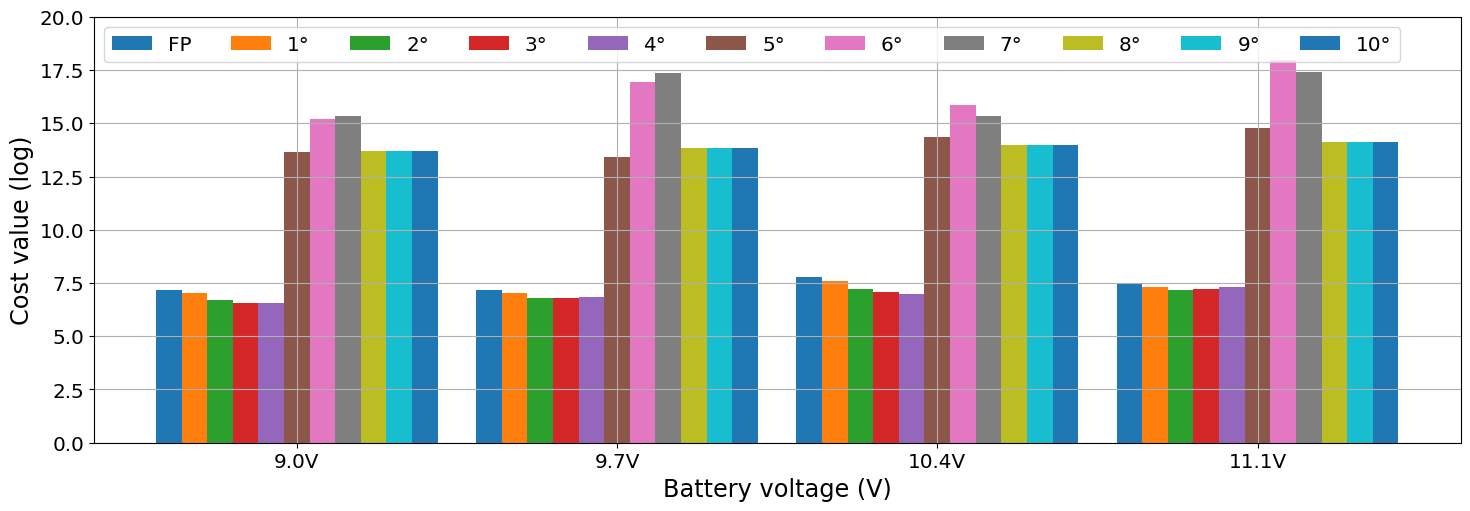

In [45]:
species = ("9.0V", "9.7V", "10.4V", "11.1V")
penguin_means = {
    'FP' : (V_ed_090_log, V_ed_097_log, V_ed_104_log, V_ed_111_log),
    '1°' : (V_1o_090_log, V_1o_097_log, V_1o_104_log, V_1o_111_log),
    '2°' : (V_2o_090_log, V_2o_097_log, V_2o_104_log, V_2o_111_log),
    '3°' : (V_3o_090_log, V_3o_097_log, V_3o_104_log, V_3o_111_log),
    '4°' : (V_4o_090_log, V_4o_097_log, V_4o_104_log, V_4o_111_log),
    '5°' : (V_5o_090_log, V_5o_097_log, V_5o_104_log, V_5o_111_log),
    '6°' : (V_6o_090_log, V_6o_097_log, V_6o_104_log, V_6o_111_log),
    '7°' : (V_7o_090_log, V_7o_097_log, V_7o_104_log, V_7o_111_log),
    '8°' : (V_8o_090_log, V_8o_097_log, V_8o_104_log, V_8o_111_log),
    '9°' : (V_9o_090_log, V_9o_097_log, V_9o_104_log, V_9o_111_log),
    '10°': (V_0o_090_log, V_0o_097_log, V_0o_104_log, V_0o_111_log)
}

x = np.arange(len(species))  # the label locations
width = 0.08  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=[15,5])
ax.grid(True)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=200)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost value (log)', fontsize='xx-large')
ax.set_xlabel('Battery voltage (V)', fontsize='xx-large')
#ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width*5, species)
ax.legend(loc='upper left', ncol=11, fontsize='x-large')
ax.set_ylim(0, 20)

ax.tick_params(labelsize='x-large')

plt.show()
fig.savefig(fname='../figures/cost_value.png')